In [116]:
import IPython
import pandas as pd
import numpy as np
from statistics import mode
import statsmodels.api as sm
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler

In [117]:
# load modified file with some pre-processing completed
df = pd.read_csv("preprocessed_4.csv", index_col=0)
df.shape

(100120, 54)

In [118]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,0,0,0,1,1,1,1,1,0,0
age,1,2,3,4,5,6,7,8,9,10
admission_type_id,5,1,1,1,1,1,3,1,1,3
discharge_disposition_id,18,1,1,1,1,1,1,1,1,2
admission_source_id,1,7,7,7,7,1,1,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12
num_lab_procedures,41,59,11,44,51,31,70,73,68,33


In [120]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

df[i] = df[i].astype('object')

In [121]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [123]:
L1 = np.random.randint(1,10,20)
L2 = np.random.randint(1,20, 20)

datframe = pd.DataFrame()
datframe['L1'] = L1
datframe['L2'] = L2

In [124]:
datframe.corr()

,L1,L2
L1,1.000000,-0.295177
L2,-0.295177,1.000000


In [125]:
scaler = MinMaxScaler()
datframe = pd.DataFrame(scaler.fit_transform(datframe), columns = ['L1', 'L2'])
datframe.corr()

,L1,L2
L1,1.000000,-0.295177
L2,-0.295177,1.000000


In [126]:
"""
This code converts age as categorical variable to a continuous approximation by assuming mid-point of each age-category as
the actual age value. This is done to avoid having to deal with age as a dummy variable in the models which makes
interpretation very cumbersome. Also, since age category is not purely nominal but ordinal, we do not want to lose that
information by treating it as a simple categorical variable.
"""

# convert age back to integer type
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     25564
7     22186
6     17102
9     16708
5      9626
4      3765
10     2669
3      1650
2       690
1       160
Name: age, dtype: int64
75    25564
65    22186
55    17102
85    16708
45     9626
35     3765
95     2669
25     1650
15      690
5       160
Name: age, dtype: int64


In [127]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [128]:
num_col

['num_procedures',
 'nummed',
 'age',
 'numchange',
 'num_lab_procedures',
 'number_emergency',
 'service_utilization',
 'num_medications',
 'number_inpatient',
 'time_in_hospital',
 'number_outpatient',
 'number_diagnoses']

In [129]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value (2)

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [130]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,num_procedures,1.326020,0.890773,1.700335,No,NA,1.326020,0.890773,1.700335
1,nummed,0.675116,0.277244,0.921620,No,NA,0.675116,0.277244,0.921620
2,age,-0.626715,0.274302,15.947496,No,NA,-0.626715,0.274302,15.947496
3,numchange,1.425310,1.433619,0.487858,No,NA,1.425310,1.433619,0.487858
4,num_lab_procedures,-0.241491,-0.253099,19.620228,No,NA,-0.241491,-0.253099,19.620228
5,number_emergency,22.842251,1185.246374,0.935517,Yes,log1p,3.661064,16.276610,0.315405
6,service_utilization,5.334724,67.779770,2.292730,Yes,log1p,1.119136,0.547353,0.662373
7,num_medications,1.333039,3.523472,8.092612,No,NA,1.333039,3.523472,8.092612
8,number_inpatient,3.626402,20.833542,1.261825,Yes,log1p,1.450492,1.405364,0.510433
9,time_in_hospital,1.137931,0.871189,2.974528,No,NA,1.137931,0.871189,2.974528


In [132]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [133]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [134]:
df.shape

(100120, 54)

In [136]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [137]:
numerics

['num_procedures',
 'nummed',
 'age',
 'number_outpatient_log1p',
 'numchange',
 'num_lab_procedures',
 'service_utilization_log1p',
 'num_medications',
 'number_emergency_log1p',
 'time_in_hospital',
 'number_inpatient_log1p',
 'number_diagnoses']

In [138]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                            int64
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
p

In [139]:
df.A1Cresult.value_counts()

-99    83243
 1     11935
 0      4942
Name: A1Cresult, dtype: int64

In [140]:
dfcopy = df.copy(deep = True)

In [141]:
df = dfcopy.copy(deep = True)

In [142]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [143]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [144]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,change,diabetesMed,readmitted,numchange,nummed,level1_diag1,number_emergency_log1p,service_utilization_log1p,number_inpatient_log1p,number_outpatient_log1p
0,2278392,8222157,Caucasian,0,5,5,18,1,1,41,...,0,0,0,0,0,4,0.0,0.0,0.0,0.0
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,1,1,0,1,1,0,0.0,0.0,0.0,0.0


In [145]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [146]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [147]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,1,1,1
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8


### Scaling applied to df; using df2 from here

In [150]:
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [153]:
# Logical order: duplicate removal, then outlier removal followed by scaling

In [154]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(70442, 55)

In [157]:
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

In [159]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [160]:
df2[numerics] = standardize(df2[numerics])

In [162]:
import seaborn as sns
from matplotlib.colors import ListedColormap
# my_cmap = ListedColormap(sns.color_palette("RdYlGn", n_colors=15).as_hex())
# my_cmap = ListedColormap(sns.diverging_palette(150, 250, sep=120, n=28, center="light").as_hex())

my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
# drop some columns due to their means is round to 0
# table = df.drop(['acetohexamide','tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','patient_nbr', 'encounter_id', 'service_utilization_log1p'], axis = 1).corr(method='pearson')
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

/Users/t_shahh/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


In [163]:
pd.options.display.max_rows = 400

c = df2.corr().abs()
s = c.unstack()
print(s.shape)
so = s.sort_values(ascending=False)

so[38:120]

(2304,)


glipizide                            glipizide                              1.000000
glyburide                            glyburide                              1.000000
tolbutamide                          tolbutamide                            1.000000
pioglitazone                         pioglitazone                           1.000000
rosiglitazone                        rosiglitazone                          1.000000
acarbose                             acarbose                               1.000000
change|num_medications               change|num_medications                 1.000000
encounter_id                         encounter_id                           1.000000
time_in_hospital                     number_diagnoses|time_in_hospital      0.935819
number_diagnoses|time_in_hospital    time_in_hospital                       0.935819
numchange                            num_medications|numchange              0.899794
num_medications|numchange            numchange                   

In [164]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)

In [165]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [166]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['num_medications|num_lab_procedures',
 'pioglitazone',
 'glimepiride',
 'glipizide',
 'nateglinide',
 'numchange',
 'service_utilization_log1p',
 'encounter_id',
 'num_medications',
 'number_emergency_log1p',
 'repaglinide',
 'number_inpatient_log1p',
 'acetohexamide',
 'num_procedures',
 'miglitol',
 'metformin-rosiglitazone',
 'time_in_hospital|num_lab_procedures',
 'age|number_diagnoses',
 'glyburide',
 'insulin',
 'diabetesMed',
 'num_medications|number_diagnoses',
 'num_medications|numchange',
 'metformin',
 'chlorpropamide',
 'nummed',
 'number_outpatient_log1p',
 'metformin-pioglitazone',
 'tolbutamide',
 'num_lab_procedures',
 'tolazamide',
 'A1Cresult',
 'num_medications|num_procedures',
 'number_diagnoses|time_in_hospital',
 'time_in_hospital',
 'rosiglitazone',
 'patient_nbr',
 'glyburide-metformin',
 'number_diagnoses',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'age',
 'change|num_medications',
 'num_medications|time_in_hospital',
 'troglitazone',
 'acarbose']

In [167]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

# new_non_num_cols

In [168]:
new_non_num_cols

['race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [169]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

### Modeling

In [196]:
feature_set_1 = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 
                 'race_Hispanic', 'race_Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 
                 'admission_source_id_9', 'max_glu_serum_0', 
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 
                 'num_medications|time_in_hospital',
                 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures',
                 'num_medications|num_lab_procedures',
                 'num_medications|number_diagnoses',
                 'age|number_diagnoses',
                 'change|num_medications',
                 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [197]:
for feature in feature_set_1:
    print(df_pd[feature].value_counts())

 0.588336    15761
-0.071067    13908
-0.730470    10988
 1.247740     9977
-1.389874     6036
-2.049277     2385
 1.907143     1661
-2.708681      959
Name: age, dtype: int64
-0.402933    11225
-0.766884    10984
-1.130834     9622
-0.038983     8438
 0.324968     5973
 0.688918     4425
 1.052869     3365
 1.416819     2408
 1.780770     1636
 2.144720     1235
 2.508671      999
 2.872621      753
 3.236572      612
Name: time_in_hospital, dtype: int64
-0.808437    27322
-0.227578    12562
 0.353281     7930
 0.934139     6181
 2.676715     3045
 1.514998     2571
 2.095857     2064
Name: num_procedures, dtype: int64
-0.422797    3872
-0.282987    3834
-0.562607    3686
-0.702418    3550
-0.143177    3466
-0.003366    3463
-0.842228    3333
 0.136444    3239
-0.982038    2925
 0.276254    2886
 0.416065    2595
-1.121849    2447
 0.555875    2307
 0.695685    2073
-1.261659    1929
 0.835495    1799
 0.975306    1600
-1.401469    1437
 1.115116    1356
 1.254926    1144
 1.394737   

In [198]:
feature_set_2 = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'service_utilization_log1p', 
                 'number_diagnoses', 'nummed', 'race_AfricanAmerican', 'race_Asian', 
                 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 'admission_source_id_8', 
                 'admission_source_id_9', 'admission_source_id_11', 'numchange', 
                 'num_medications|time_in_hospital',
                 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures',
                 'num_medications|num_lab_procedures',
                 'num_medications|number_diagnoses',
                 'age|number_diagnoses',
                 'change|num_medications',
                 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange',
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [199]:
# full_feature_list = ['age', 'time_in_hospital', 'num_lab_procedures',
#        'num_procedures', 'num_medications', 'number_outpatient_log1p',
#        'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses',
#        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
#        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
#        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
#        'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
#        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
#        'metformin-pioglitazone', 'diabetesMed', 'service_utilization_log1p',
#        'level1_diag1', 'race_?', 'race_AfricanAmerican', 'race_Asian',
#        'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_0', 'gender_1',
#        'admission_type_id_1', 'admission_type_id_2', 'admission_type_id_3',
#        'admission_type_id_4', 'admission_type_id_5', 'admission_type_id_6',
#        'admission_type_id_7', 'admission_type_id_8',
#        'discharge_disposition_id_1', 'discharge_disposition_id_2',
#        'discharge_disposition_id_3', 'discharge_disposition_id_4',
#        'discharge_disposition_id_5', 'discharge_disposition_id_6',
#        'discharge_disposition_id_7', 'discharge_disposition_id_8',
#        'discharge_disposition_id_9', 'discharge_disposition_id_10',
#        'discharge_disposition_id_12', 'discharge_disposition_id_13',
#        'discharge_disposition_id_14', 'discharge_disposition_id_15',
#        'discharge_disposition_id_16', 'discharge_disposition_id_17',
#        'discharge_disposition_id_18', 'discharge_disposition_id_19',
#        'discharge_disposition_id_20', 'discharge_disposition_id_22',
#        'discharge_disposition_id_23', 'discharge_disposition_id_24',
#        'discharge_disposition_id_25', 'discharge_disposition_id_27',
#        'discharge_disposition_id_28', 'admission_source_id_1',
#        'admission_source_id_2', 'admission_source_id_3',
#        'admission_source_id_4', 'admission_source_id_5',
#        'admission_source_id_6', 'admission_source_id_7',
#        'admission_source_id_8', 'admission_source_id_9',
#        'admission_source_id_10', 'admission_source_id_11',
#        'admission_source_id_13', 'admission_source_id_14',
#        'admission_source_id_17', 'admission_source_id_20',
#        'admission_source_id_22', 'admission_source_id_25', 'max_glu_serum_-99',
#        'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_-99', 'A1Cresult_0',
#        'A1Cresult_1', 'nummed', 'numchange', 'nummed|change',
#      'num_medications|time_in_hospital',
#      'num_medications|num_procedures',
#      'time_in_hospital|num_lab_procedures',
#      'num_medications|num_lab_procedures',
#      'num_medications|number_diagnoses',
#      'age|number_diagnoses',
#      'change|num_medications',
#      'number_diagnoses|time_in_hospital',
#      'num_medications|numchange']

In [200]:
train_input = df_pd[feature_set_1]
train_output = df_pd['readmitted']

In [201]:
df_pd['readmitted'].value_counts()

0    56476
1     5199
Name: readmitted, dtype: int64

In [202]:
train_input.columns

Index(['age', 'time_in_hospital', 'num_procedures', 'num_medications',
       'number_outpatient_log1p', 'number_emergency_log1p',
       'number_inpatient_log1p', 'number_diagnoses', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'tolazamide', 'insulin', 'glyburide-metformin', 'race_AfricanAmerican',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'gender_1', 'admission_type_id_3', 'admission_type_id_5',
       'discharge_disposition_id_2', 'discharge_disposition_id_7',
       'discharge_disposition_id_10', 'discharge_disposition_id_18',
       'admission_source_id_4', 'admission_source_id_7',
       'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1',
       'A1Cresult_0', 'A1Cresult_1', 'num_medications|time_in_hospital',
       'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures',
       'num_medications|n

In [203]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import RandomizedLogisticRegression
# clffeat = RandomizedLogisticRegression()
# X_train, X_dev, Y_train, Y_dev = train_test_split(train_input, train_output, test_size=0.20, random_state=0)
# clffeat.fit(train_input,train_output)
# lstfeat = list(clffeat.get_support(indices=True))
# score = list(clffeat.all_scores_)

In [204]:
# favorfeatures = [list(X_train.columns)[i] for i in lstfeat]

In [205]:
# score  = [float(x) for x in score]
# Z = [(x[1],x[0]) for x in sorted(zip(score,X_train.columns), reverse = True)]
# Znew = []
# for x in Z:
#     if x[0] in favorfeatures:
#         Znew.append(x)

In [206]:
# Znew

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input, train_output, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=25))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

Cross Validation Score: 91.67%
Dev Set score: 91.16%


In [208]:
Y_dev_predict = logreg.predict(X_dev)

In [209]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,1580,1580
1,157,157
All,1737,1737


In [210]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))

Accuracy is 0.91
Precision is 0.00
Recall is 0.00


/Users/t_shahh/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [211]:
from imblearn.over_sampling import SMOTE

from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 56476, 1: 5199})
New dataset shape Counter({0: 56476, 1: 56476})


In [212]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=25))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

Cross Validation Score: 61.11%
Dev Set score: 60.62%


In [214]:
Y_dev_predict = logreg.predict(X_dev)

In [215]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,7436,3832,11268
1,5065,6258,11323
All,12501,10090,22591


In [216]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_logreg = accuracy_score(Y_dev, Y_dev_predict)
precision_logreg = precision_score(Y_dev, Y_dev_predict)
recall_logreg = recall_score(Y_dev, Y_dev_predict)
auc_logreg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.61
Precision is 0.62
Recall is 0.55
AUC is 0.61


In [217]:
import statsmodels.api as sm
logit = sm.Logit(Y_train, X_train)

result = logit.fit()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.663424
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                90361
Model:                          Logit   Df Residuals:                    90304
Method:                           MLE   Df Model:                           56
Date:                Tue, 05 Dec 2017   Pseudo R-squ.:                 0.04288
Time:                        00:34:58   Log-Likelihood:                -59948.
converged:                       True   LL-Null:                       -62633.
                                        LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
age                                     0.2418      0.018 

In [63]:
[print(fname, coeffs) for fname, coeffs in zip(X_train.columns, np.round(logreg.coef_[0],3))];

age 0.359
time_in_hospital 0.173
num_procedures -0.11
num_medications -0.13
number_outpatient_log1p 0.021
number_emergency_log1p 0.031
number_inpatient_log1p 0.152
number_diagnoses 0.447
metformin 0.017
repaglinide 0.529
nateglinide -0.176
chlorpropamide -0.658
glimepiride -0.008
acetohexamide 0.0
glipizide 0.151
glyburide 0.137
tolbutamide -0.394
pioglitazone -0.046
rosiglitazone 0.058
acarbose -0.332
miglitol -0.493
troglitazone -0.106
tolazamide -0.358
insulin 0.209
glyburide-metformin 0.192
glipizide-metformin -0.265
glimepiride-pioglitazone 0.0
metformin-rosiglitazone -0.048
metformin-pioglitazone -0.046
race_AfricanAmerican 0.218
race_Asian 0.087
race_Caucasian 0.168
race_Hispanic 0.116
race_Other -0.115
gender_1 0.028
admission_type_id_3 -0.083
admission_type_id_4 0.285
admission_type_id_5 0.024
discharge_disposition_id_2 0.867
discharge_disposition_id_7 0.463
discharge_disposition_id_10 1.927
discharge_disposition_id_18 0.362
admission_source_id_4 -0.346
admission_source_id_7 -

In [64]:
logreg.intercept_

array([ 0.74539954])

In [65]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=7, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=25))))
dte.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dte.score(X_dev, Y_dev)))

Cross Validation score: 90.04%
Dev Set score: 90.19%


In [66]:
Y_dev_predict = dte.predict(X_dev)

In [67]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11154,114,11268
1,2103,9220,11323
All,13257,9334,22591


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dte = accuracy_score(Y_dev, Y_dev_predict)
precision_dte = precision_score(Y_dev, Y_dev_predict)
recall_dte = recall_score(Y_dev, Y_dev_predict)
auc_dte = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.90
Precision is 0.99
Recall is 0.81
AUC is 0.90


In [69]:
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(max_depth=7, criterion = "gini", min_samples_split=10)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(dtg, X_train, Y_train, cv=25))))
dtg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dtg.score(X_dev, Y_dev)))

Cross Validation Score: 90.33%
Dev Set score: 90.29%


In [70]:
Y_dev_predict = dtg.predict(X_dev)

In [71]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11149,119,11268
1,2074,9249,11323
All,13223,9368,22591


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dtg = accuracy_score(Y_dev, Y_dev_predict)
precision_dtg = precision_score(Y_dev, Y_dev_predict)
recall_dtg = recall_score(Y_dev, Y_dev_predict)
auc_dtg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.90
Precision is 0.99
Recall is 0.82
AUC is 0.90


In [73]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=7, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=25))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 91.08%
Dev Set score: 90.37%


In [74]:
Y_dev_predict = forrest.predict(X_dev)

In [75]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10813,455,11268
1,1720,9603,11323
All,12533,10058,22591


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forreste = accuracy_score(Y_dev, Y_dev_predict)
precision_forreste = precision_score(Y_dev, Y_dev_predict)
recall_forreste = recall_score(Y_dev, Y_dev_predict)
auc_forreste = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.90
Precision is 0.95
Recall is 0.85
AUC is 0.90


In [77]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=7, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=25))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 91.07%
Dev Set score: 90.06%


In [78]:
Y_dev_predict = forrest.predict(X_dev)

In [79]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10693,575,11268
1,1670,9653,11323
All,12363,10228,22591


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forrestg = accuracy_score(Y_dev, Y_dev_predict)
precision_forrestg = precision_score(Y_dev, Y_dev_predict)
recall_forrestg = recall_score(Y_dev, Y_dev_predict)
auc_forrestg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.90
Precision is 0.94
Recall is 0.85
AUC is 0.90


In [81]:
# valdepth= 0
# valsplit = 0
# valestimators = 0
# valscore = 0

# for b in range(5,15):
#     for i in range (3,15):
#         for z in range (5,15):
#             forrest = RandomForestClassifier(n_estimators = b, max_depth=i,criterion="gini",min_samples_split=z)
#             scores = cross_val_score(forrest, X_train, Y_train, cv=5)
#             score_mean = np.mean(scores)
#             if valscore < score_mean:
#                 valscore = score_mean
#                 valdepth = i
#                 valsplit = z
#                 valestimators = b

# forrest = RandomForestClassifier(n_estimators = b, max_depth=valdepth,criterion="entropy",min_samples_split=valsplit)

# print("MODEL: RANDOM FORESTS WITH GINI AS ATTRIBUTE SELECTION METHOD \n")
# print("\nParamters for best model \nmax_depth : " + str(valdepth) + "\nmin_samples_split : " + str(valsplit) + "\n")

# print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train[favorfeatures], Y_train, cv=25))))
# forrest.fit(X_train, Y_train)
# print("Dev Set Score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

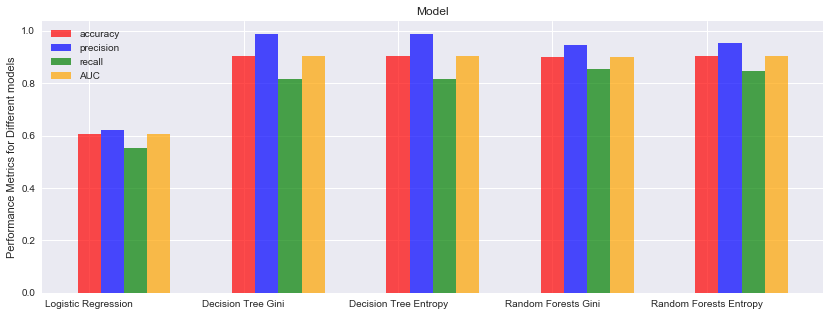

In [82]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [accuracy_logreg, accuracy_dtg, accuracy_dte, accuracy_forrestg, accuracy_forreste]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [precision_logreg, precision_dtg, precision_dte, precision_forrestg, precision_forreste]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [recall_logreg, recall_dtg, recall_dte, recall_forrestg, recall_forreste]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [auc_logreg, auc_dtg, auc_dte, auc_forrestg, auc_forreste]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

In [83]:
coefs = [(x[2], x[1]) for x in sorted(zip(list(np.abs(logreg.coef_[0])), list(logreg.coef_[0]), list(train_input.columns)), reverse = True)]
print("Logistic Regression Coefficients in decreasing order of coefficient values")
coefs

Logistic Regression Coefficients in decreasing order of coefficient values


[('discharge_disposition_id_10', 1.9272380125178454),
 ('discharge_disposition_id_2', 0.86748242935619746),
 ('chlorpropamide', -0.65838194498501168),
 ('repaglinide', 0.52896584461854179),
 ('miglitol', -0.4933863567212427),
 ('discharge_disposition_id_7', 0.46265040334398105),
 ('number_diagnoses', 0.4468003719967048),
 ('tolbutamide', -0.39389244722596584),
 ('discharge_disposition_id_18', 0.36154493811944949),
 ('age', 0.35853849610186078),
 ('tolazamide', -0.35804771657246609),
 ('admission_source_id_4', -0.34551546422415419),
 ('acarbose', -0.3317912831028218),
 ('admission_type_id_4', 0.28469773288475114),
 ('admission_source_id_9', -0.27543388140951003),
 ('glipizide-metformin', -0.26473810112927609),
 ('level1_diag1_1.0', 0.25512978851752255),
 ('race_AfricanAmerican', 0.21810992510843258),
 ('insulin', 0.20850551330145861),
 ('glyburide-metformin', 0.19164797750214355),
 ('level1_diag1_2.0', -0.18495098826026946),
 ('level1_diag1_4.0', 0.17676121061337619),
 ('nateglinide', -

In [84]:
impforrest = [(x[1], x[0]) for x in sorted(zip(list(forrest.feature_importances_), list(train_input.columns)), reverse = True)]
print("Random Forest Feature Importance in decreasing order")
impforrest

Random Forest Feature Importance in decreasing order


[('discharge_disposition_id_2', 0.16379866384606737),
 ('insulin', 0.14033058362311443),
 ('race_AfricanAmerican', 0.092997171354201755),
 ('level1_diag1_1.0', 0.087027450795144567),
 ('admission_source_id_7', 0.082526648687256676),
 ('race_Caucasian', 0.070579344023783103),
 ('level1_diag1_2.0', 0.050343418546520392),
 ('gender_1', 0.035923949414491382),
 ('change|num_medications', 0.030882242301451302),
 ('A1Cresult_1', 0.029736683908666857),
 ('admission_type_id_3', 0.021605868018003661),
 ('metformin', 0.020959525990735785),
 ('level1_diag1_5.0', 0.020872612115676089),
 ('level1_diag1_4.0', 0.020805094099258514),
 ('glipizide', 0.018682842667858999),
 ('admission_type_id_5', 0.014285984855514185),
 ('number_inpatient_log1p', 0.012837350046686503),
 ('admission_source_id_4', 0.01168474607963679),
 ('age', 0.011299211389492593),
 ('num_medications|numchange', 0.0095745378038051502),
 ('num_procedures', 0.0094549773369971436),
 ('rosiglitazone', 0.0073848812446977484),
 ('level1_diag1

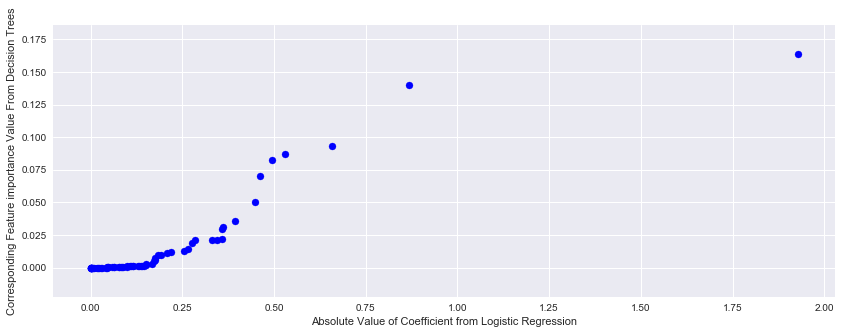

In [85]:
# plotting the absolute values of the coefficients from logistic regression with the feature importance from decision trees
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)
x = [np.abs(val[1]) for val in coefs]
y = [val[1] for val in impforrest]
plt.scatter(x, y, color = 'blue')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("Absolute Value of Coefficient from Logistic Regression")
plt.ylabel("Corresponding Feature importance Value From Decision Trees")
plt.show()

## Feature set 2 (Simple)

In [86]:
train_input = df_pd[feature_set_2]
train_output = df_pd['readmitted']

In [87]:
from imblearn.over_sampling import SMOTE

from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 56476, 1: 5199})
New dataset shape Counter({0: 56476, 1: 56476})


In [88]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=25))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

Cross Validation Score: 60.78%
Dev Set score: 60.75%


In [90]:
import statsmodels.api as sm
logit = sm.Logit(Y_train, X_train)

result = logit.fit()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.665699
         Iterations 21
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                90361
Model:                          Logit   Df Residuals:                    90318
Method:                           MLE   Df Model:                           42
Date:                Mon, 04 Dec 2017   Pseudo R-squ.:                 0.03960
Time:                        23:57:14   Log-Likelihood:                -60153.
converged:                       True   LL-Null:                       -62633.
                                        LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
age                                     0.1907      0.017

In [91]:
Y_dev_predict = logreg.predict(X_dev)

In [92]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,7467,3801,11268
1,5067,6256,11323
All,12534,10057,22591


In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_logreg = accuracy_score(Y_dev, Y_dev_predict)
precision_logreg = precision_score(Y_dev, Y_dev_predict)
recall_logreg = recall_score(Y_dev, Y_dev_predict)
auc_logreg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.61
Precision is 0.62
Recall is 0.55
AUC is 0.61


In [94]:
[print(fname, coeffs) for fname, coeffs in zip(X_train.columns, np.round(logreg.coef_[0],3))];

age 0.361
time_in_hospital 0.128
num_lab_procedures -0.024
num_procedures -0.106
service_utilization_log1p 0.128
number_diagnoses 0.47
nummed 0.067
race_AfricanAmerican 0.204
race_Asian 0.081
race_Caucasian 0.138
race_Hispanic 0.095
race_Other -0.101
gender_1 0.034
admission_type_id_3 -0.093
admission_type_id_4 0.336
admission_type_id_5 0.015
discharge_disposition_id_2 0.872
discharge_disposition_id_7 0.444
discharge_disposition_id_10 2.065
discharge_disposition_id_18 0.337
admission_source_id_4 -0.28
admission_source_id_7 -0.123
admission_source_id_8 -0.06
admission_source_id_9 -0.229
admission_source_id_11 -0.158
numchange 0.162
num_medications|time_in_hospital 0.0
num_medications|num_procedures 0.001
time_in_hospital|num_lab_procedures -0.0
num_medications|num_lab_procedures 0.0
num_medications|number_diagnoses -0.001
age|number_diagnoses -0.003
change|num_medications -0.005
number_diagnoses|time_in_hospital -0.001
num_medications|numchange -0.015
level1_diag1_1.0 0.248
level1_diag1

In [95]:
logreg.intercept_

array([ 1.03396038])

In [96]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=7, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=25))))
dte.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dte.score(X_dev, Y_dev)))

Cross Validation score: 88.78%
Dev Set score: 88.68%


In [97]:
Y_dev_predict = dte.predict(X_dev)

In [98]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10811,457,11268
1,2100,9223,11323
All,12911,9680,22591


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dte = accuracy_score(Y_dev, Y_dev_predict)
precision_dte = precision_score(Y_dev, Y_dev_predict)
recall_dte = recall_score(Y_dev, Y_dev_predict)
auc_dte = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.89
Precision is 0.95
Recall is 0.81
AUC is 0.89


In [100]:
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(max_depth=7, criterion = "gini", min_samples_split=10)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(dtg, X_train, Y_train, cv=25))))
dtg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dtg.score(X_dev, Y_dev)))

Cross Validation Score: 90.61%
Dev Set score: 90.52%


In [101]:
Y_dev_predict = dtg.predict(X_dev)

In [102]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11072,196,11268
1,1946,9377,11323
All,13018,9573,22591


In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dtg = accuracy_score(Y_dev, Y_dev_predict)
precision_dtg = precision_score(Y_dev, Y_dev_predict)
recall_dtg = recall_score(Y_dev, Y_dev_predict)
auc_dtg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.91
Precision is 0.98
Recall is 0.83
AUC is 0.91


In [104]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=7, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=25))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 91.79%
Dev Set score: 91.82%


In [105]:
Y_dev_predict = forrest.predict(X_dev)

In [106]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10963,305,11268
1,1542,9781,11323
All,12505,10086,22591


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forreste = accuracy_score(Y_dev, Y_dev_predict)
precision_forreste = precision_score(Y_dev, Y_dev_predict)
recall_forreste = recall_score(Y_dev, Y_dev_predict)
auc_forreste = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.92
Precision is 0.97
Recall is 0.86
AUC is 0.92


In [108]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=7, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=25))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 91.96%
Dev Set score: 91.78%


In [109]:
Y_dev_predict = forrest.predict(X_dev)

In [110]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11050,218,11268
1,1638,9685,11323
All,12688,9903,22591


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forrestg = accuracy_score(Y_dev, Y_dev_predict)
precision_forrestg = precision_score(Y_dev, Y_dev_predict)
recall_forrestg = recall_score(Y_dev, Y_dev_predict)
auc_forrestg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.92
Precision is 0.98
Recall is 0.86
AUC is 0.92


In [112]:
# valdepth= 0
# valsplit = 0
# valestimators = 0
# valscore = 0

# for b in range(5,15):
#     for i in range (3,15):
#         for z in range (5,15):
#             forrest = RandomForestClassifier(n_estimators = b, max_depth=i,criterion="gini",min_samples_split=z)
#             scores = cross_val_score(forrest, X_train, Y_train, cv=5)
#             score_mean = np.mean(scores)
#             if valscore < score_mean:
#                 valscore = score_mean
#                 valdepth = i
#                 valsplit = z
#                 valestimators = b

# forrest = RandomForestClassifier(n_estimators = b, max_depth=valdepth,criterion="entropy",min_samples_split=valsplit)

# print("MODEL: RANDOM FORESTS WITH GINI AS ATTRIBUTE SELECTION METHOD \n")
# print("\nParamters for best model \nmax_depth : " + str(valdepth) + "\nmin_samples_split : " + str(valsplit) + "\n")

# print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train[favorfeatures], Y_train, cv=25))))
# forrest.fit(X_train, Y_train)
# print("Dev Set Score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

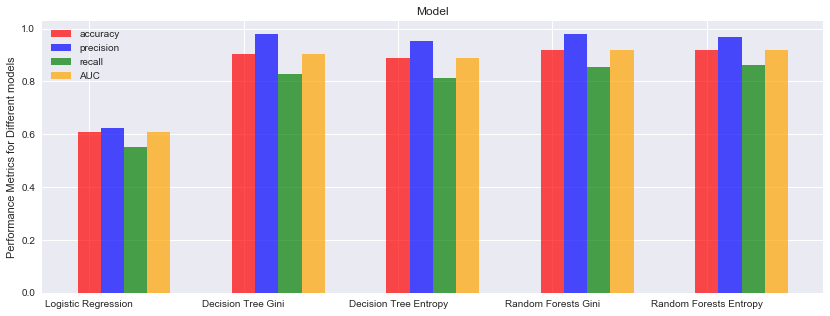

In [113]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [accuracy_logreg, accuracy_dtg, accuracy_dte, accuracy_forrestg, accuracy_forreste]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [precision_logreg, precision_dtg, precision_dte, precision_forrestg, precision_forreste]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [recall_logreg, recall_dtg, recall_dte, recall_forrestg, recall_forreste]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [auc_logreg, auc_dtg, auc_dte, auc_forrestg, auc_forreste]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()